In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# 1. Import the data
data = pd.read_csv('demo_factors_ohe.csv')
data.head()

,18-24,25-34,35-44,45-54,55-64,65,Female,Gender Variant/Non-Conforming,Male,College,...,White or Caucasian,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency,Present Bias
0,0,0,1,0,0,0,1,0,0,0,...,0,4,2,10,9,10,9,8,2,1
1,0,1,0,0,0,0,1,0,0,0,...,1,6,2,7,10,9,7,8,1,1
2,0,1,0,0,0,0,0,1,0,0,...,1,4,2,6,8,8,8,7,1,1
3,0,1,0,0,0,0,0,0,1,0,...,0,5,2,10,10,10,10,10,2,0
4,1,0,0,0,0,0,0,0,1,0,...,1,5,2,10,10,10,10,10,2,0


In [46]:
# 2. Scale the data
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,18-24,25-34,35-44,45-54,55-64,65,Female,Gender Variant/Non-Conforming,Male,College,...,White or Caucasian,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency,Present Bias
0,0.000000,0.000000,0.046881,0.0,0.0,0.0,0.046881,0.000000,0.000000,0.0,...,0.000000,0.187523,0.093761,0.468807,0.421927,0.468807,0.421927,0.375046,0.093761,0.046881
1,0.000000,0.050702,0.000000,0.0,0.0,0.0,0.050702,0.000000,0.000000,0.0,...,0.050702,0.304212,0.101404,0.354914,0.507020,0.456318,0.354914,0.405616,0.050702,0.050702
2,0.000000,0.057448,0.000000,0.0,0.0,0.0,0.000000,0.057448,0.000000,0.0,...,0.057448,0.229794,0.114897,0.344691,0.459588,0.459588,0.459588,0.402139,0.057448,0.057448
3,0.000000,0.043153,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.043153,0.0,...,0.000000,0.215766,0.086306,0.431532,0.431532,0.431532,0.431532,0.431532,0.086306,0.000000
4,0.043153,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.043153,0.0,...,0.043153,0.215766,0.086306,0.431532,0.431532,0.431532,0.431532,0.431532,0.086306,0.000000


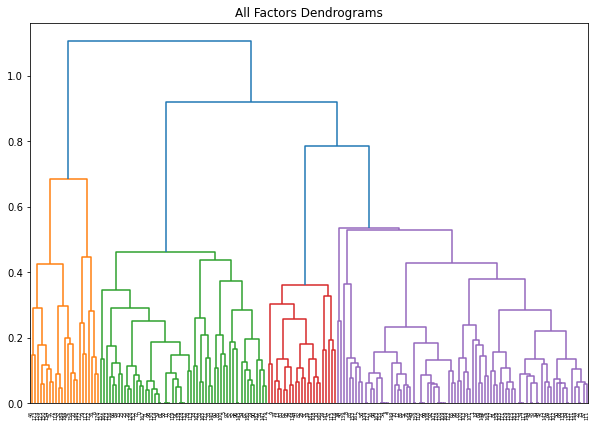

In [53]:
# 3. Cluster the data
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("All Factors Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

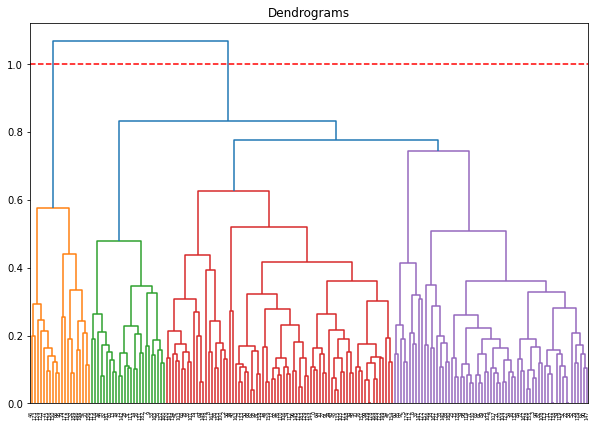

In [48]:
# reset the threshold
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.0, color='r', linestyle='--')

In [50]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 3, 0,
       0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 1, 3, 1,
       2, 1, 3, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       3, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 3, 1, 3, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 0, 0, 2, 2, 1, 3, 0, 1, 0, 1, 3, 3, 3, 0, 0, 0, 1, 0, 2,
       0, 1, 1, 1, 3, 0, 0, 1, 0, 0, 2, 1, 1, 1, 3, 0, 1, 1, 3, 1, 2, 1,
       1, 0, 3, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 3, 1, 1,
       0, 3, 1, 0, 0, 2, 2, 1, 3, 3])

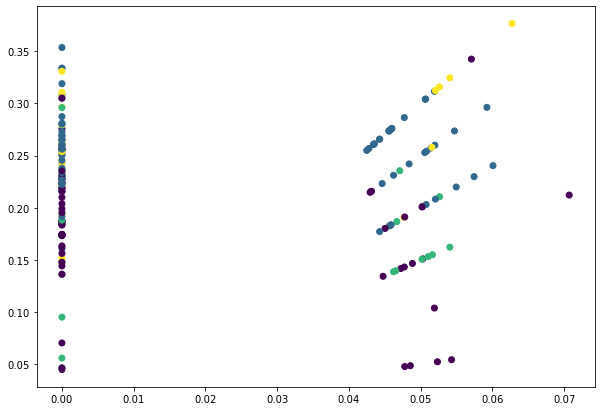

In [51]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['White or Caucasian'], data_scaled['MFA Familiarity Count'], c=cluster.labels_)

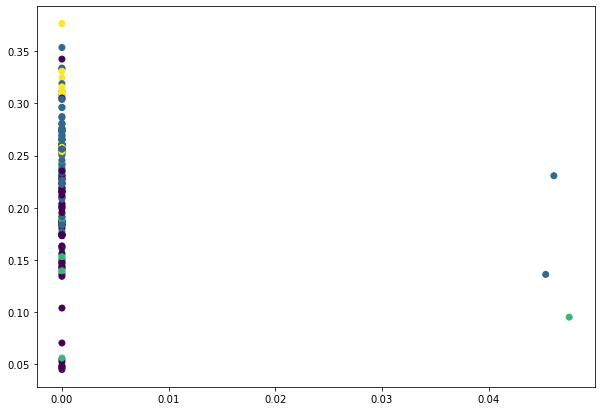

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Asian or Pacific Islander'], data_scaled['MFA Familiarity Count'], c=cluster.labels_)

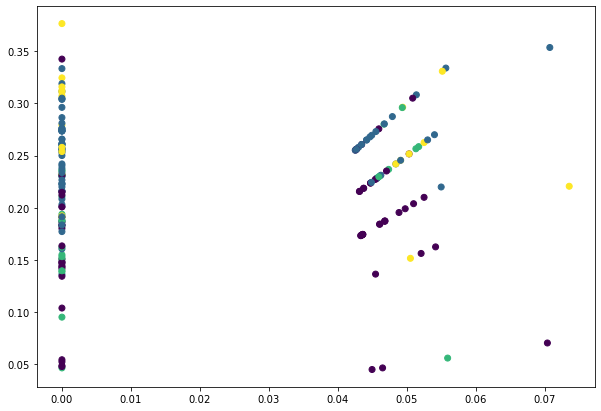

In [53]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Black or African American'], data_scaled['MFA Familiarity Count'], c=cluster.labels_)

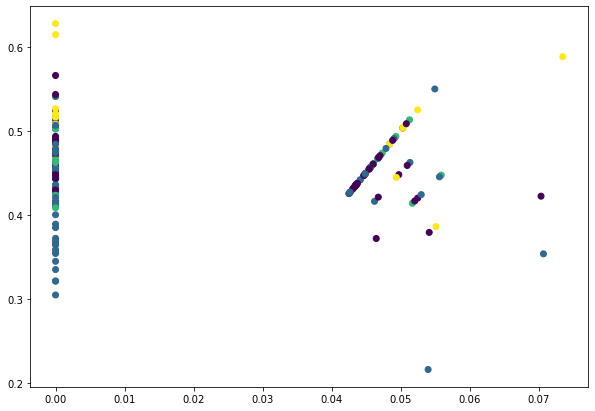

In [54]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Black or African American'], data_scaled['Security Importance'], c=cluster.labels_)

## Ethnicity Data Hierarchical Clustering

In [55]:
data = pd.read_csv('demo_factors_ohe.csv')

In [56]:
data.columns


Index(['18-24', '25-34', '35-44', '45-54', '55-64', '65', 'Female',
       'Gender Variant/Non-Conforming', 'Male', 'College', 'Elementary School',
       'Graduate School', 'High School', 'Prefer Not to Answer',
       'Asian or Pacific Islander', 'Black or African American',
       'Hispanic or Latino', 'Indian', 'Two or more races',
       'White or Caucasian', 'MFA Familiarity Count', 'Security Beliefs',
       'Security Importance', 'Quick Log In Importance',
       'Log In Usability Importance', 'Log In Convenience Importance',
       'Log In Satisfaction', 'MFA Opt In Frequency', 'Present Bias'],
      dtype='object')

In [57]:
data_eth = data.iloc[:,14:21]
data = data_eth

In [58]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Asian or Pacific Islander,Black or African American,Hispanic or Latino,Indian,Two or more races,White or Caucasian,MFA Familiarity Count
0,0.0,0.000000,0.0,0.0,0.242536,0.000000,0.970143
1,0.0,0.000000,0.0,0.0,0.000000,0.164399,0.986394
2,0.0,0.000000,0.0,0.0,0.000000,0.242536,0.970143
3,0.0,0.196116,0.0,0.0,0.000000,0.000000,0.980581
4,0.0,0.000000,0.0,0.0,0.000000,0.196116,0.980581


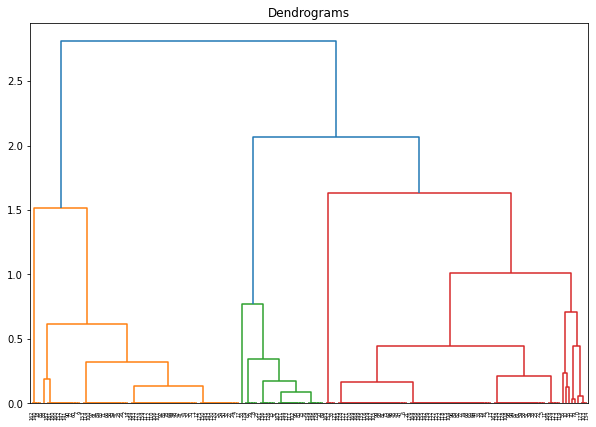

In [59]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

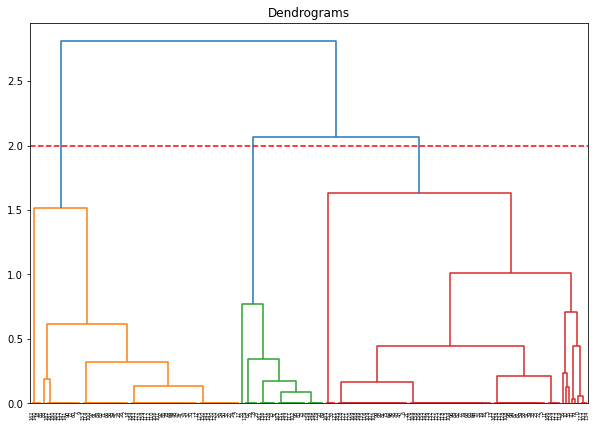

In [60]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0,
       0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 0])

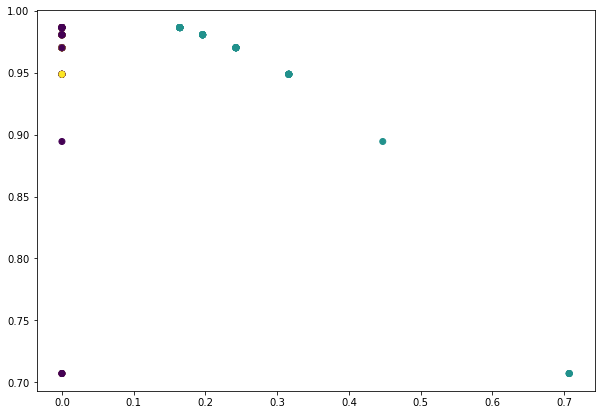

In [62]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['White or Caucasian'], data_scaled['MFA Familiarity Count'], c=cluster.labels_)

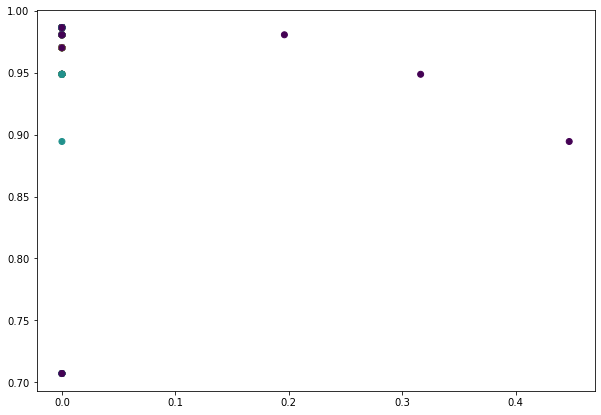

In [63]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Asian or Pacific Islander'], data_scaled['MFA Familiarity Count'], c=cluster.labels_)

In [ ]:
data_ = data.iloc[:,14:21]

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# education: col 9-14
"""
# Using DataFrame.drop
df.drop(df.columns[[1, 2]], axis=1, inplace=True)

# drop by Name
df1 = df1.drop(['B', 'C'], axis=1)

# Select the ones you want
df1 = df[['a','d']]
"""
data_ed = pd.read_csv('demo_factors_ohe.csv')

#### Running Education against Opt In Frequency

In [50]:
data_ed_col = data_ed[['Prefer Not to Answer','MFA Familiarity Count', 'Security Beliefs', 'Security Importance', 'Quick Log In Importance','Log In Usability Importance', 'Log In Convenience Importance', 'Log In Satisfaction','MFA Opt In Frequency']]
data_ed_col

,Prefer Not to Answer,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency
0,0,4,2,10,9,10,9,8,2
1,0,6,2,7,10,9,7,8,1
2,0,4,2,6,8,8,8,7,1
3,0,5,2,10,10,10,10,10,2
4,0,5,2,10,10,10,10,10,2
...,...,...,...,...,...,...,...,...,...
181,0,3,2,10,10,10,10,6,3
182,0,3,2,8,10,7,10,7,2
183,0,6,2,10,8,8,8,7,2
184,0,6,2,10,6,6,6,10,3


In [51]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data_ed_col)
data_scaled = pd.DataFrame(data_scaled, columns=data_ed_col.columns)
data_scaled.head()

,Prefer Not to Answer,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency
0,0.0,0.188562,0.094281,0.471405,0.424264,0.471405,0.424264,0.377124,0.094281
1,0.0,0.306186,0.102062,0.357217,0.510310,0.459279,0.357217,0.408248,0.051031
2,0.0,0.231714,0.115857,0.347571,0.463428,0.463428,0.463428,0.405499,0.057928
3,0.0,0.216574,0.086630,0.433148,0.433148,0.433148,0.433148,0.433148,0.086630
4,0.0,0.216574,0.086630,0.433148,0.433148,0.433148,0.433148,0.433148,0.086630


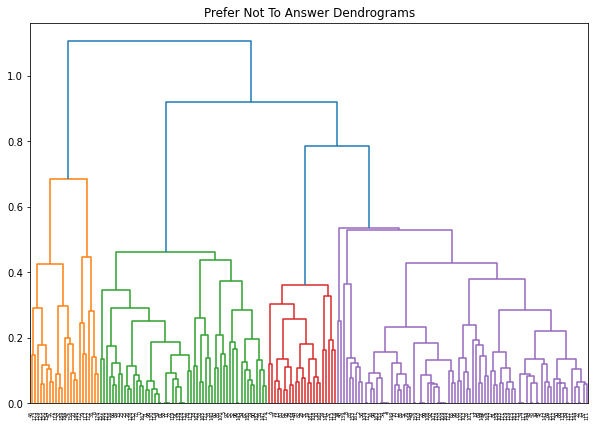

In [52]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Prefer Not To Answer Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [46]:
# 1. Select the data
data_ed_col = data_ed[['College', 'Elementary School', 'Graduate School', 'High School', 'Prefer Not to Answer','Log In Usability Importance']]
data_ed_col

,College,Elementary School,Graduate School,High School,Prefer Not to Answer,Log In Usability Importance
0,0,0,1,0,0,10
1,0,0,1,0,0,9
2,0,0,0,1,0,8
3,0,0,0,1,0,10
4,0,0,1,0,0,10
...,...,...,...,...,...,...
181,0,0,1,0,0,10
182,0,0,0,1,0,7
183,1,0,0,0,0,8
184,1,0,0,0,0,6


In [22]:
# 2. Normalize the data
from sklearn.preprocessing import normalize
data_scaled = normalize(data_ed_col)
data_scaled = pd.DataFrame(data_scaled, columns=data_ed_col.columns)
data_scaled.head()

,College,Elementary School,Graduate School,High School,Prefer Not to Answer,Log In Usability Importance
0,0.0,0.0,0.099504,0.000000,0.0,0.995037
1,0.0,0.0,0.110432,0.000000,0.0,0.993884
2,0.0,0.0,0.000000,0.124035,0.0,0.992278
3,0.0,0.0,0.000000,0.099504,0.0,0.995037
4,0.0,0.0,0.099504,0.000000,0.0,0.995037


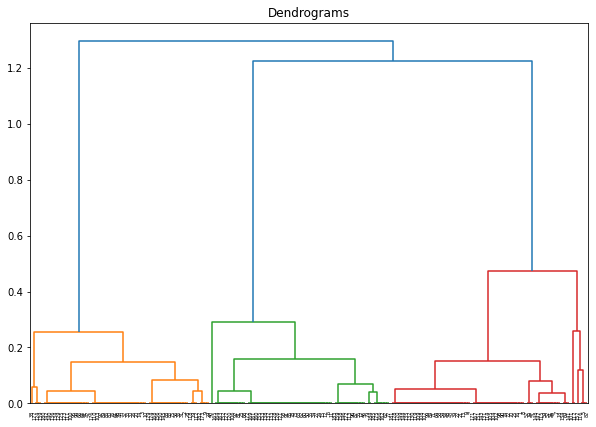

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

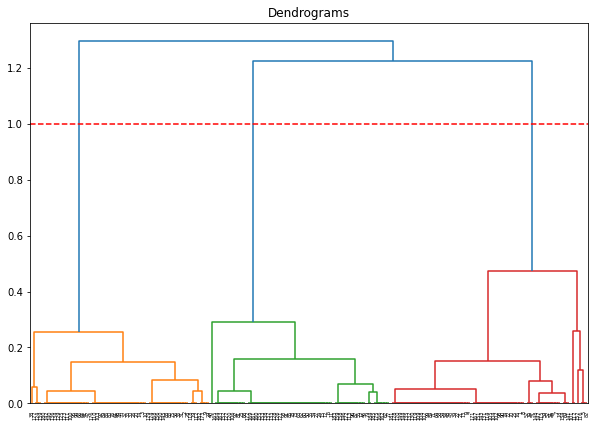

In [24]:
# reset the threshold
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.0, color='r', linestyle='--')